In [22]:
import math
import numpy as np
import pandas as pd
from functools import reduce
from scipy.special import expit
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc
from matplotlib.backends.backend_pdf import PdfPages

In [24]:
df = pd.read_csv('C:/Users/lzoeckler/Desktop/for_allison/PID_BLUE_FULL_cleaned.csv')
df['null_IgM'] = df['IgG'].add(df['IgA'])
end_df = df.copy(deep=True)
df.head()

,binary_result,green_result,pink_result,IgG,IgA,IgM,IgG_IgA_IgM,null_IgM
0,1,1,1,5.700,0.020,0.100,5.820,5.720
1,1,1,1,6.080,0.020,0.100,6.200,6.100
2,1,1,1,7.804,0.044,0.100,7.948,7.848
3,1,1,1,10.050,0.020,0.100,10.170,10.070
4,1,1,1,9.136,0.020,1.263,10.419,9.156


In [25]:
IgG_data = df['IgG'].values
IgM_data = df['IgM'].values
IgA_data = df['IgA'].values
combined_data = df['IgG_IgA_IgM'].values
null_IgM_data = df['null_IgM'].values
all_data = df[['IgG', 'IgM', 'IgA']].as_matrix()
test_vals = df['binary_result']
binary_data = test_vals.values.reshape(-1, 1)

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [26]:
clf_IgG = linear_model.LogisticRegression(random_state=0)
clf_IgG.fit(IgG_data.reshape(-1, 1), binary_data)
probabilities = clf_IgG.predict_proba(IgG_data.reshape(-1,1))
end_df['probability_of_1_IgG_based'] = probabilities[:, 1]

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
clf_IgM = linear_model.LogisticRegression(random_state=0)
clf_IgM.fit(IgM_data.reshape(-1, 1), binary_data)
probabilities = clf_IgM.predict_proba(IgM_data.reshape(-1,1))
end_df['probability_of_1_IgM_based'] = probabilities[:, 1]

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
clf_combined = linear_model.LogisticRegression(random_state=0)
clf_combined.fit(combined_data.reshape(-1, 1), binary_data)
probabilities = clf_combined.predict_proba(combined_data.reshape(-1,1))
end_df['probability_of_1_combined_based'] = probabilities[:, 1]

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
clf_null_IgM = linear_model.LogisticRegression(random_state=0)
clf_null_IgM.fit(null_IgM_data.reshape(-1, 1), binary_data)
probabilities = clf_null_IgM.predict_proba(null_IgM_data.reshape(-1,1))
end_df['probability_of_1_null_IgM_based'] = probabilities[:, 1]

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
clf_all = linear_model.LogisticRegression(random_state=0)
clf_all.fit(all_data, binary_data)
probabilities = clf_all.predict_proba(all_data) 
end_df['probability_of_1_multivariate'] = probabilities[:, 1]

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
pp = PdfPages('C:/Users/lzoeckler/Desktop/for_allison/logistic_PID_BLUE_FULL.pdf')

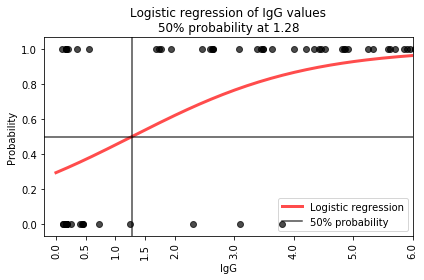

In [32]:
f = plt.figure()
plt.scatter(IgG_data, binary_data, color='black', zorder=20, alpha=0.7)
X_test = np.linspace(0, 20, 300)
loss = expit(X_test * clf_IgG.coef_ + clf_IgG.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3, alpha=0.7,
         label='Logistic regression')
fifty_prob = ((0 - clf_IgG.intercept_) / clf_IgG.coef_).item()
plt.axvline(fifty_prob, color='k', alpha=0.7, label='50% probability')
plt.axhline(0.5, color='k', alpha=0.7)
plt.ylabel('Probability')
plt.xlabel('IgG')
plt.xlim(-.2, 6)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0], rotation='vertical')
plt.legend()
plt.title('Logistic regression of IgG values\n50% probability at {}'.format(
    round(fifty_prob, 2)))
plt.tight_layout()
plt.show()
pp.savefig(f)
plt.close()

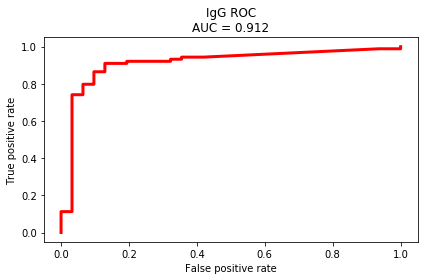

In [33]:
f = plt.figure()
test_vals = df['binary_result']
test_pred = clf_IgG.predict_proba(IgG_data.reshape(-1,1))[:, 1]
fpr, tpr, threshold = roc_curve(test_vals, test_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', linewidth=3)
plt.title('IgG ROC\nAUC = {}'.format(round(roc_auc, 3)))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.tight_layout()
plt.show()
pp.savefig(f)
plt.close()

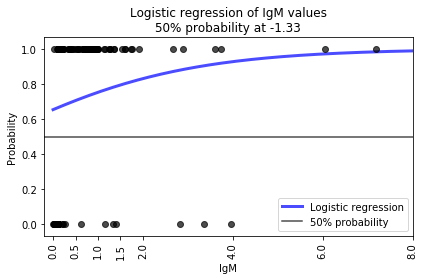

In [13]:
f = plt.figure()
plt.scatter(IgM_data, binary_data, color='black', zorder=20, alpha=0.7)
X_test = np.linspace(0, 20, 300)
loss = expit(X_test * clf_IgM.coef_ + clf_IgM.intercept_).ravel()
plt.plot(X_test, loss, color='blue', linewidth=3, alpha=0.7,
         label='Logistic regression')
fifty_prob = ((0 - clf_IgM.intercept_) / clf_IgM.coef_).item()
plt.axvline(fifty_prob, color='k', alpha=0.7, label='50% probability')
plt.axhline(0.5, color='k', alpha=0.7)
plt.ylabel('Probability')
plt.xlabel('IgM')
plt.xlim(-.2, 8)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0], rotation='vertical')
plt.legend()
plt.title('Logistic regression of IgM values\n50% probability at {}'.format(
    round(fifty_prob, 2)))
plt.tight_layout()
plt.show()
pp.savefig(f)
plt.close()

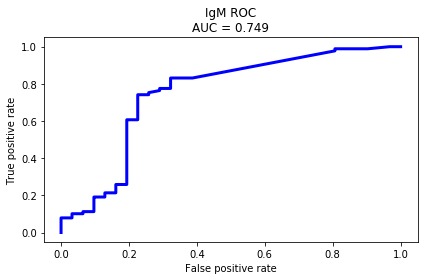

In [14]:
f = plt.figure()
test_vals = df['binary_result']
test_pred = clf_IgM.predict_proba(IgM_data.reshape(-1,1))[:, 1]
fpr, tpr, threshold = roc_curve(test_vals, test_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', linewidth=3)
plt.title('IgM ROC\nAUC = {}'.format(round(roc_auc, 3)))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.tight_layout()
plt.show()
pp.savefig(f)
plt.close()

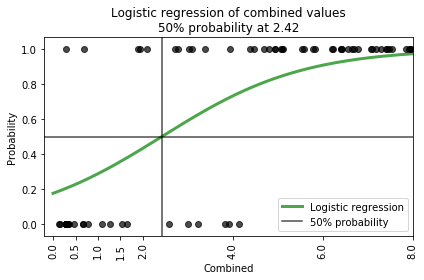

In [34]:
f = plt.figure()
plt.scatter(combined_data, binary_data, color='black', zorder=20, alpha=0.7)
X_test = np.linspace(0, 20, 300)
loss = expit(X_test * clf_combined.coef_ + clf_combined.intercept_).ravel()
plt.plot(X_test, loss, color='green', linewidth=3, alpha=0.7,
         label='Logistic regression')
fifty_prob = ((0 - clf_combined.intercept_) / clf_combined.coef_).item()
plt.axvline(fifty_prob, color='k', alpha=0.7, label='50% probability')
plt.axhline(0.5, color='k', alpha=0.7)
plt.ylabel('Probability')
plt.xlabel('Combined')
plt.xlim(-.2, 8)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0], rotation='vertical')
plt.legend()
plt.title('Logistic regression of combined values\n50% probability at {}'.format(
    round(fifty_prob, 2)))
plt.tight_layout()
plt.show()
pp.savefig(f)
plt.close()

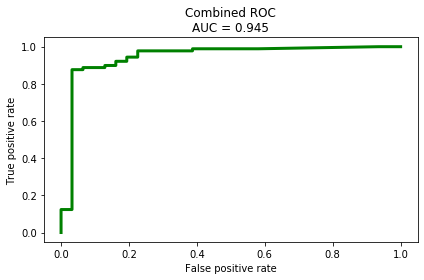

In [35]:
f = plt.figure()
test_vals = df['binary_result']
test_pred = clf_combined.predict_proba(combined_data.reshape(-1,1))[:, 1]
fpr, tpr, threshold = roc_curve(test_vals, test_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', linewidth=3)
plt.title('Combined ROC\nAUC = {}'.format(round(roc_auc, 3)))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.tight_layout()
plt.show()
pp.savefig(f)
plt.close()

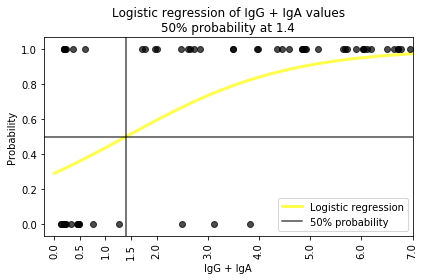

In [17]:
f = plt.figure()
plt.scatter(null_IgM_data, binary_data, color='black', zorder=20, alpha=0.7)
X_test = np.linspace(0, 20, 300)
loss = expit(X_test * clf_null_IgM.coef_ + clf_null_IgM.intercept_).ravel()
plt.plot(X_test, loss, color='yellow', linewidth=3, alpha=0.7,
         label='Logistic regression')
fifty_prob = ((0 - clf_null_IgM.intercept_) / clf_null_IgM.coef_).item()
plt.axvline(fifty_prob, color='k', alpha=0.7, label='50% probability')
plt.axhline(0.5, color='k', alpha=0.7)
plt.ylabel('Probability')
plt.xlabel('IgG + IgA')
plt.xlim(-.2, 7)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], rotation='vertical')
plt.legend()
plt.title('Logistic regression of IgG + IgA values\n50% probability at {}'.format(
    round(fifty_prob, 2)))
plt.tight_layout()
plt.show()
pp.savefig(f)
plt.close()

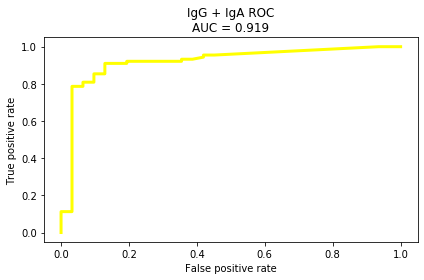

In [18]:
f = plt.figure()
test_vals = df['binary_result']
test_pred = clf_null_IgM.predict_proba(null_IgM_data.reshape(-1,1))[:, 1]
fpr, tpr, threshold = roc_curve(test_vals, test_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='yellow', linewidth=3)
plt.title('IgG + IgA ROC\nAUC = {}'.format(round(roc_auc, 3)))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.tight_layout()
plt.show()
pp.savefig(f)
plt.close()

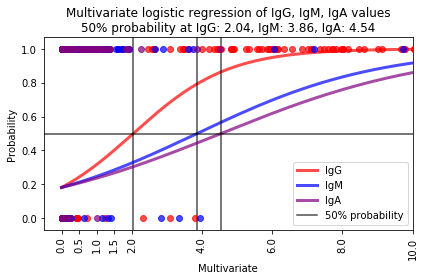

In [19]:
f = plt.figure()
X_test = np.linspace(0, 30, 300)
# IgG
plt.scatter(IgG_data, binary_data, color='red', zorder=20, alpha=0.7)
loss_IgG = expit(X_test * clf_all.coef_[:, 0] + clf_all.intercept_).ravel()
plt.plot(X_test, loss_IgG, color='r', linewidth=3, label='IgG', alpha=0.7)
IgG_prob = ((0 - clf_all.intercept_) / clf_all.coef_[:, 0]).item()
plt.axvline(IgG_prob, color='k', alpha=0.7)
# IgM
plt.scatter(IgM_data, binary_data, color='blue', zorder=20, alpha=0.7)
loss_IgM = expit(X_test * clf_all.coef_[:, 1] + clf_all.intercept_).ravel()
plt.plot(X_test, loss_IgM, color='b', linewidth=3, label='IgM', alpha=0.7)
IgM_prob = ((0 - clf_all.intercept_) / clf_all.coef_[:, 1]).item()
plt.axvline(IgM_prob, color='k', alpha=0.7)
# IgA
plt.scatter(IgA_data, binary_data, color='purple', zorder=20, alpha=0.7)
loss_IgA = expit(X_test * clf_all.coef_[:, 2] + clf_all.intercept_).ravel()
plt.plot(X_test, loss_IgA, color='purple', linewidth=3, label='IgA',
         alpha=0.7)
IgA_prob = ((0 - clf_all.intercept_) / clf_all.coef_[:, 2]).item()
plt.axvline(IgA_prob, color='k', alpha=0.7, label='50% probability')
# Graph settings/titles
plt.title('Multivariate logistic regression of IgG, IgM, IgA values\n50% probability at IgG: {}, IgM: {}, IgA: {}'.format(
    round(IgG_prob, 2), round(IgM_prob, 2), round(IgA_prob, 2)))
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Multivariate')
plt.xlim(-.5, 10)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 4.0, 6.0, 8.0, 10.0], rotation='vertical')
plt.axhline(0.5, color='k', alpha=0.7)
plt.tight_layout()
plt.show()
pp.savefig(f)
plt.close()

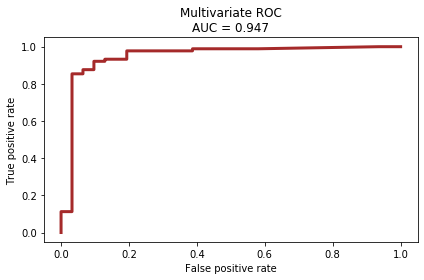

In [20]:
f = plt.figure()
test_vals = df['binary_result']
test_pred = clf_all.predict_proba(all_data)[:, 1]
fpr, tpr, threshold = roc_curve(test_vals, test_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='brown', linewidth=3)
plt.title('Multivariate ROC\nAUC = {}'.format(round(roc_auc, 3)))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.tight_layout()
plt.show()
pp.savefig(f)
plt.close()

In [36]:
pp.close()

In [22]:
((.8 - clf_combined.intercept_) / clf_combined.coef_).item()

3.215573102264371

In [23]:
((.2 - clf_combined.intercept_) / clf_combined.coef_).item()

2.496455062416312

In [24]:
end_df.head()

,binary_result,IgG,IgA,IgM,IgG_IgA_IgM,null_IgM,probability_of_1_IgG_based,probability_of_1_IgM_based,probability_of_1_combined_based,probability_of_1_null_IgM_based,probability_of_1_multivariate
0,0,0.12,0.02,0.020,0.160,0.14,0.260089,0.563846,0.148119,0.259576,0.142254
1,0,0.12,0.01,0.010,0.140,0.13,0.260089,0.562456,0.146025,0.257648,0.141407
2,0,0.17,0.02,0.100,0.290,0.19,0.270588,0.574922,0.162333,0.269359,0.154442
3,0,0.17,0.02,0.100,0.290,0.19,0.270588,0.574922,0.162333,0.269359,0.154442
4,0,0.17,0.03,0.269,0.469,0.20,0.270588,0.598064,0.183679,0.271343,0.164834
